# Casement Aerordrome Weather 1945 - Present (PDA Project 2019)

## Investigation of the dataset
I will simulate a dataset, sourced from Met Eireann [1]. This dataset will be investigated and then simulated.

In [2]:
# Import pandas and load the dataset
import pandas as pd
df = pd.read_csv('mly3723.csv',skiprows=18) # read in the csv and skip the non-data explanatory rows.

The dataset contains the following variables :

year - year of the measurement

month - month of the measurement

rain - Precipitation Amount (mm)

meant - Mean Air Temperature (C)

maxtp - Maximum Air Temperature (C)

mintp - Minimum Air Temperature (C)

mnmax - Mean Maximum Temperature (C)

mnmin - Mean Minimum Temperature (C)

gmin - Grass Minimum Temperature (C)

wdsp - Mean Wind Speed (knot)

mxgt - Highest Gust (knot)

sun - Sunshine duration (hours)


In [3]:
df.describe()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,sun
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,1991.210526,6.473684,9.466617,18.221203,-0.366165,13.234586,5.701504,61.773835,-3.856842,113.964662
std,16.010658,3.457093,3.915470,4.763040,4.318500,4.452386,3.459947,33.833433,4.528277,52.220373
min,1964.000000,1.000000,-0.500000,5.400000,-15.700000,3.300000,-4.200000,1.700000,-17.100000,22.100000
25%,1977.000000,3.000000,6.100000,13.900000,-3.700000,9.400000,2.800000,37.100000,-7.400000,67.900000
50%,1991.000000,6.000000,8.700000,18.100000,-0.900000,12.800000,5.200000,56.800000,-4.200000,110.900000
75%,2005.000000,9.000000,13.100000,22.400000,3.300000,17.200000,8.800000,79.500000,-0.200000,151.100000
max,2019.000000,12.000000,17.800000,31.000000,9.500000,23.500000,12.900000,206.300000,8.200000,256.500000


In [4]:
# Check for missing data
df.isna().sum()

year     0
month    0
meant    0
maxtp    0
mintp    0
mnmax    0
mnmin    0
rain     0
gmin     0
wdsp     0
maxgt    0
sun      0
dtype: int64

In [5]:
# Check for missing data
df.isnull().sum()

year     0
month    0
meant    0
maxtp    0
mintp    0
mnmax    0
mnmin    0
rain     0
gmin     0
wdsp     0
maxgt    0
sun      0
dtype: int64

In [6]:
# Adding in day (assuming the first of month), so I can add python datetime
df['day'] = '01' 
df['datetime'] = pd.to_datetime(df[['year','month','day']])
df = df.set_index('datetime')
df['datetime'] = pd.to_datetime(df[['year','month','day']])

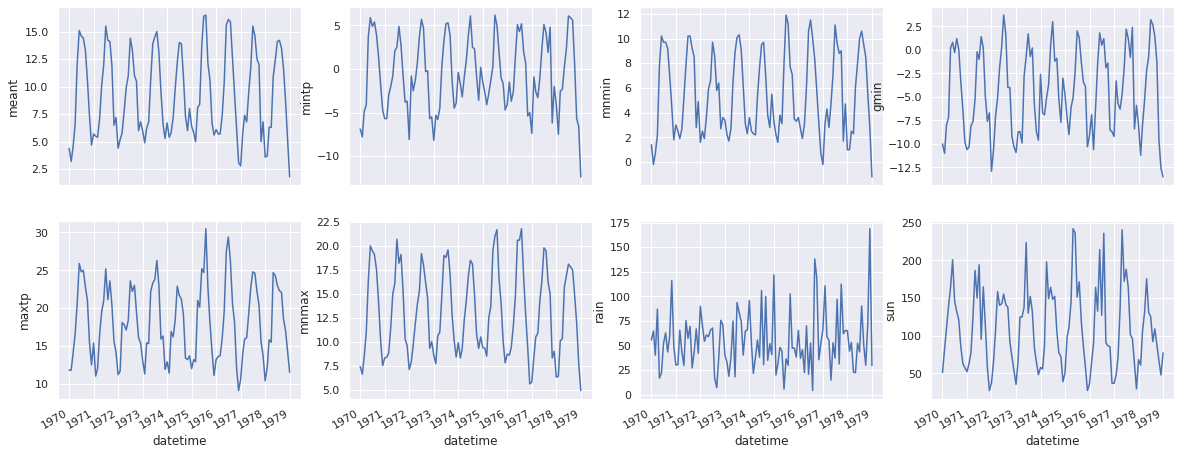

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set(style="darkgrid")
ts = df['1970-01-01':'1979-01-01'] # 109 months
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(2,4,figsize=(20,8))
sns.lineplot(x='datetime',y="meant",data=ts,ax=axes[0,0])
sns.lineplot(x='datetime',y="maxtp",data=ts,ax=axes[1,0])
sns.lineplot(x='datetime',y="mintp",data=ts,ax=axes[0,1])
sns.lineplot(x='datetime',y="mnmax",data=ts,ax=axes[1,1])
sns.lineplot(x='datetime',y="mnmin",data=ts,ax=axes[0,2])
sns.lineplot(x='datetime',y="rain",data=ts,ax=axes[1,2])
sns.lineplot(x='datetime',y="gmin",data=ts,ax=axes[0,3])
sns.lineplot(x='datetime',y="sun",data=ts,ax=axes[1,3])
axes[0,0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()


In [8]:
jan = df.loc[df.loc[:,'month'] == 1]['meant'].mean()
feb = df.loc[df.loc[:,'month'] == 2]['meant'].mean()
mar = df.loc[df.loc[:,'month'] == 3]['meant'].mean()
apr = df.loc[df.loc[:,'month'] == 4]['meant'].mean()
may = df.loc[df.loc[:,'month'] == 5]['meant'].mean()
jun = df.loc[df.loc[:,'month'] == 6]['meant'].mean()
jul = df.loc[df.loc[:,'month'] == 7]['meant'].mean()
aug = df.loc[df.loc[:,'month'] == 8]['meant'].mean()
sep = df.loc[df.loc[:,'month'] == 9]['meant'].mean()
octo = df.loc[df.loc[:,'month'] == 10]['meant'].mean()
nov = df.loc[df.loc[:,'month'] == 11]['meant'].mean()
dec = df.loc[df.loc[:,'month'] == 12]['meant'].mean()

In [9]:
df.loc[df.loc[:,'month'] == 6]['meant'].mean()

13.403636363636362

In [10]:
import numpy as np 
a = np.array([[1,3]])
b = np.array([[5, 6]])
np.concatenate([a, b],axis=0)

array([[1, 3],
       [5, 6]])

In [17]:
import numpy as np
jan_meant_100 = np.random.normal(jan,1,100)
feb_meant_100 = np.random.normal(feb,1,100)
mar_meant_100 = np.random.normal(mar,1,100)
apr_meant_100 = np.random.normal(apr,1,100)
may_meant_100 = np.random.normal(may,1,100)
jun_meant_100 = np.random.normal(jun,1,100)
jul_meant_100 = np.random.normal(jul,1,100)
aug_meant_100 = np.random.normal(aug,1,100)
sept_meant_100 = np.random.normal(sep,1,100)
oct_meant_100 = np.random.normal(octo,1,100)
nov_meant_100 = np.random.normal(nov,1,100)
dec_meant_100 = np.random.normal(dec,1,100)

In [20]:
new = pd.DataFrame()
new['Jan'] = jan_meant_100
new['Feb'] = feb_meant_100
new['Mar'] = mar_meant_100
new['Apr'] = apr_meant_100
new['May'] = may_meant_100
new['Jun'] = jun_meant_100
new['Jul'] = jul_meant_100
new['Aug'] = aug_meant_100
new['Sep'] = sept_meant_100
new['Oct'] = oct_meant_100
new['Nov'] = nov_meant_100
new['Dec'] = dec_meant_100
new

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,6.204489,3.656978,5.910197,7.452606,10.260329,12.291427,15.851461,15.069743,12.161699,10.366108,7.126092,5.962819
1,7.778281,4.166000,6.161478,8.403754,11.884287,11.933916,15.923328,14.458862,12.879611,11.557634,7.882581,5.215231
2,5.661876,5.438961,5.916051,9.247200,10.236125,14.259023,16.495458,14.623239,13.642837,10.178293,6.860966,6.304296
3,4.349585,5.073164,6.784173,6.204980,9.794320,12.315876,16.338442,15.202899,13.247888,8.989702,6.861551,8.267915
4,4.741879,5.994723,6.429608,8.407873,11.603805,14.965815,15.199035,15.199010,12.814544,10.350003,8.851151,6.691425
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.509260,2.759521,5.605205,8.129790,12.376229,15.041234,16.352852,15.535095,15.275168,9.784295,7.594481,5.128226
96,4.847625,5.421326,4.881115,9.492574,11.001041,13.436364,13.806201,14.507293,13.699881,9.727516,6.953637,5.883859
97,6.666453,5.629451,4.772732,6.549092,8.527828,15.289222,15.434611,16.095679,12.937635,8.737211,5.109838,6.727272
98,5.099897,4.546658,6.030368,7.387136,10.102253,12.847438,14.656447,15.756090,12.569636,10.532389,4.966215,5.652412


***
## References
[1] Casement Aerodrome Monthly Data 1944 - Present :  https://cli.fusio.net/cli/climate_data/webdata/mly3723.zip